In [1]:
import pandas as pd

DATA_ROOT = '.'

In [2]:
import pickle
from datasets.loader import load_dataset
from cp_runner import CPRunner
import os

directory = '/Users/lucakillmaier/Documents/Studium/BA/results/final'

results: dict[str, CPRunner] = {}
for filename in os.listdir(directory):
    if filename.endswith('.pkl'):
        filepath = os.path.join(directory, filename)
        key = os.path.splitext(filename)[0]
        try:
            with open(filepath, 'rb') as f:
                save_data = pickle.load(f)
                dataset = load_dataset(save_data['dataset_name'], 0.1, DATA_ROOT)  # hold_out_size doesn't matter here

                results[key] = CPRunner.from_save(save_data, dataset)
        except Exception as e:
            print(f"Error loading {filename}: {e}")



Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified
Files already downloaded and verified
Files already processed and verified
Files already split and verified


In [3]:

from metrics import get_results_metrics

_, y_test_adience = results['adience0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()
_, y_test_fgnet = results['fgnet0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()
_, y_test_rmnist = results['retinamnist0.15_resnet18_allscores_alllosses_5reps'].dataset.get_test_data()

results_adience_std = results['adience0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_adience_uni = results['adience0.15_resnet18uni_lacaps_ce_5reps'].get_results()
results_fgnet_std = results['fgnet0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_fgnet_uni = results['fgnet0.15_resnet18uni_lacaps_ce_5reps'].get_results()
results_rmnist_std = results['retinamnist0.15_resnet18_allscores_alllosses_5reps'].get_results()
results_rmnist_uni = results['retinamnist0.15_resnet18uni_lacaps_ce_5reps'].get_results()

df_adience_std = get_results_metrics(results_adience_std, y_test_adience, 'collect')
df_adience_uni = get_results_metrics(results_adience_uni, y_test_adience, 'collect')
df_fgnet_std = get_results_metrics(results_fgnet_std, y_test_fgnet, 'collect')
df_fgnet_uni = get_results_metrics(results_fgnet_uni, y_test_fgnet, 'collect')
df_rmnist_std = get_results_metrics(results_rmnist_std, y_test_rmnist, 'collect')
df_rmnist_uni = get_results_metrics(results_rmnist_uni, y_test_rmnist, 'collect')


In [4]:
import pandas as pd

def df_cond_ce_aps(df):
    return df[(df['loss_fn'] == 'CrossEntropy') & (df['score_alg'] == 'APS')]

def label_method(df):
    df['method'] = df['model'] + '_' + df['loss_fn'] + '_' + df['score_alg']
    return df

df_adience_ce_aps = pd.concat([df_cond_ce_aps(df_adience_std), df_cond_ce_aps(df_adience_uni)], ignore_index=True, sort=False)
df_adience_ce_aps = label_method(df_adience_ce_aps)
df_fgnet_ce_aps = pd.concat([df_cond_ce_aps(df_fgnet_std), df_cond_ce_aps(df_fgnet_uni)], ignore_index=True, sort=False)
df_fgnet_ce_aps = label_method(df_fgnet_ce_aps)
df_rmnist_ce_aps = pd.concat([df_cond_ce_aps(df_rmnist_std), df_cond_ce_aps(df_rmnist_uni)], ignore_index=True, sort=False)
df_rmnist_ce_aps = label_method(df_rmnist_ce_aps)

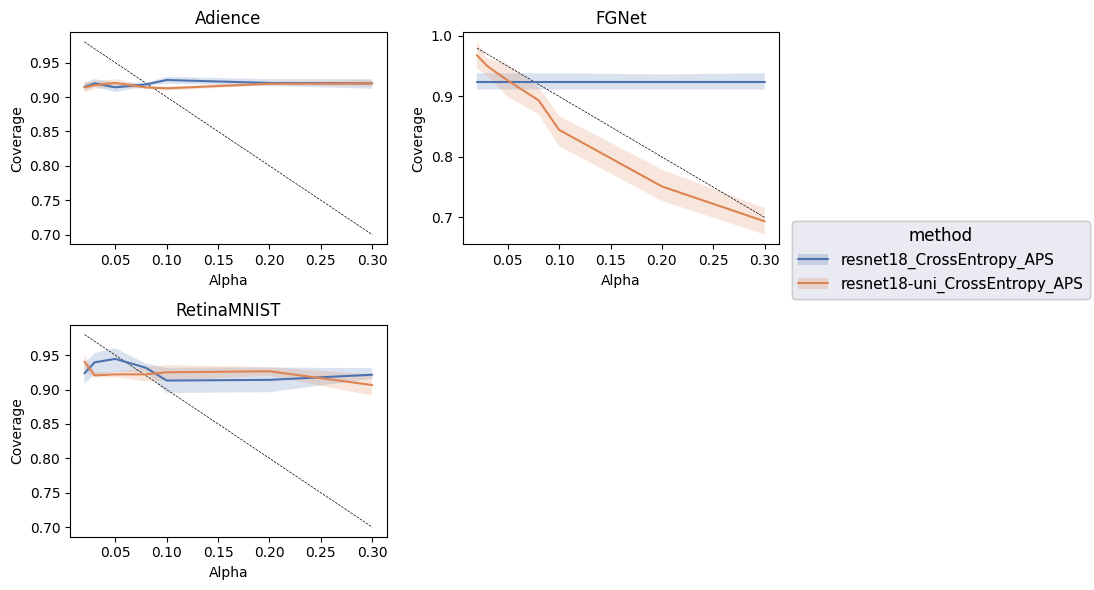

In [14]:
from plots import plot_coverage_across_alphas
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten to 1D array for easy indexing
axes = axes.flatten()

# Hide the unused 4th subplot
axes[3].axis('off')

plot_coverage_across_alphas(df_adience_ce_aps, axes[0])
plot_coverage_across_alphas(df_fgnet_ce_aps, axes[1])
plot_coverage_across_alphas(df_rmnist_ce_aps, axes[2])

axes[0].set_title('Adience')
axes[1].set_title('FGNet')
axes[2].set_title('RetinaMNIST')

plt.tight_layout()
plt.show()
plt.close()

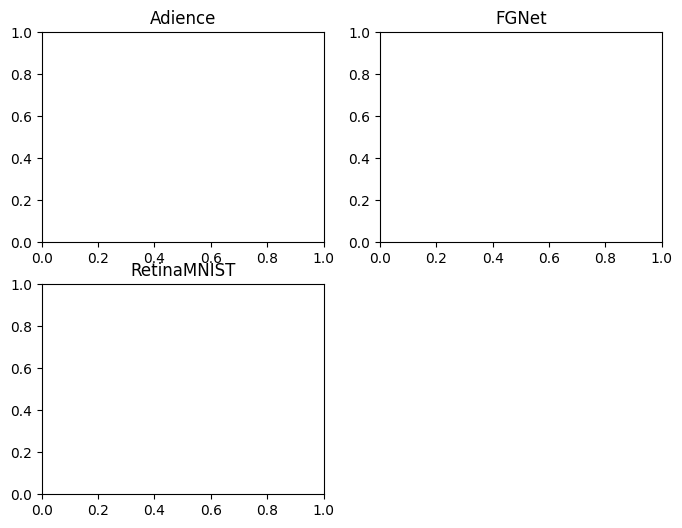

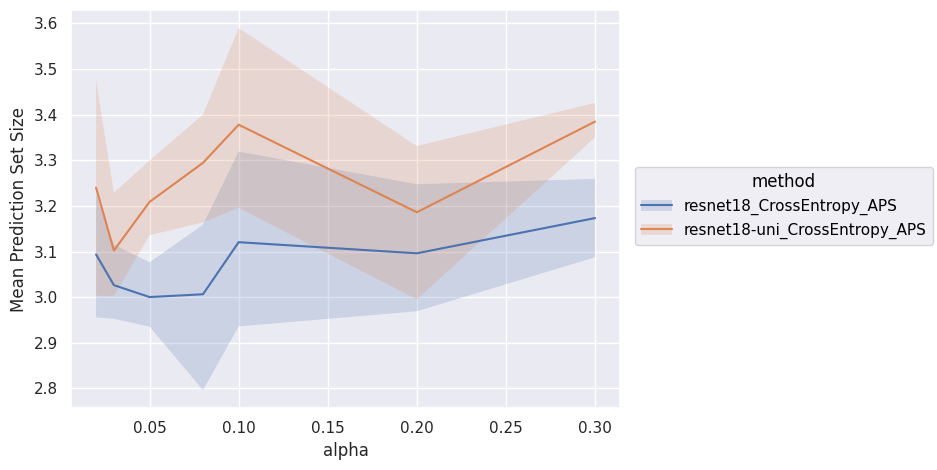

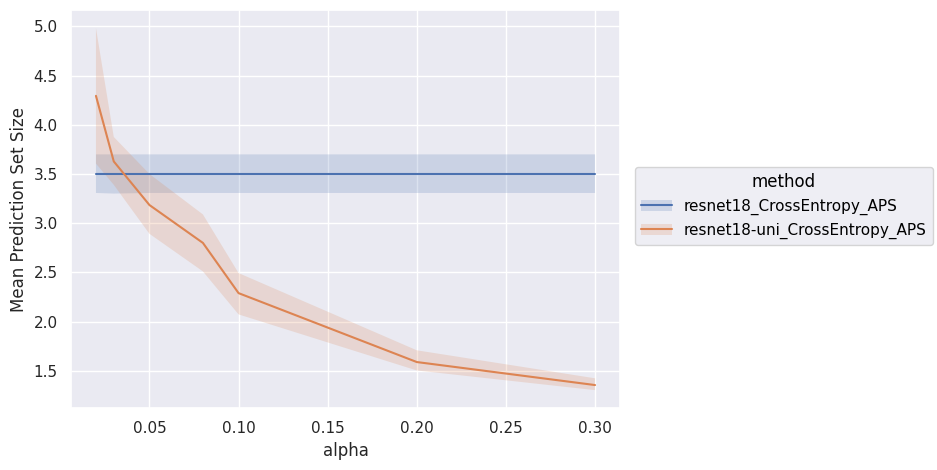

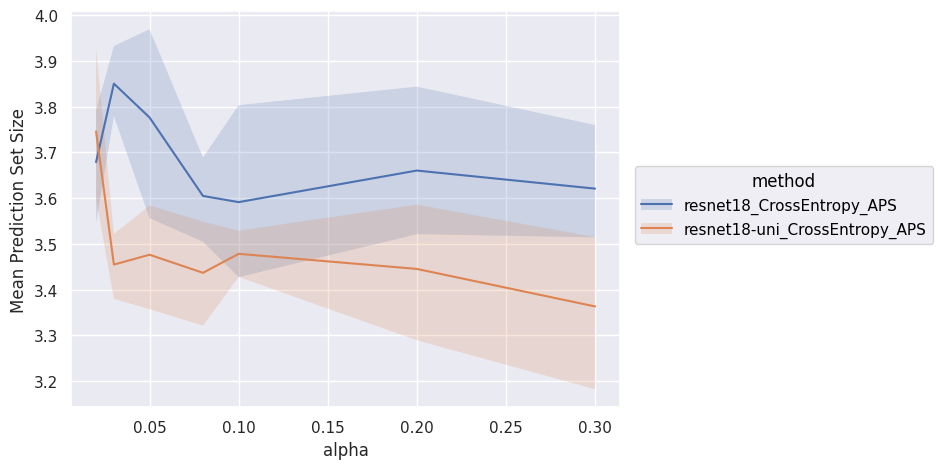

In [13]:
from plots import plot_classification_mean_width_across_alphas
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Flatten to 1D array for easy indexing
axes = axes.flatten()

# Hide the unused 4th subplot
axes[3].axis('off')

plot_classification_mean_width_across_alphas(df_adience_ce_aps, axes[0])
plot_classification_mean_width_across_alphas(df_fgnet_ce_aps, axes[1])
plot_classification_mean_width_across_alphas(df_rmnist_ce_aps, axes[2])

axes[0].set_title('Adience')
axes[1].set_title('FGNet')
axes[2].set_title('RetinaMNIST')

plt.tight_layout()
plt.show()